In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erfc
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # display plots in SVG 


################### parameters to be changed ##############################

dt = 25 # grid size for time (s)
dx = 0.0001 # grid size for space (m)
diffusion_co = 2*10**(-10) # in (m2/s)
x_max = 0.02 # in m
t_max = 10**5 # total time in (s)
C0 = 4 # surface concentration in (wt%)
 
#########################################################################    
    

# function to calculate concentration profiles based on a finite difference approximation to the 1D diffusion 
# equation and the FTCS scheme:
def diffusion_FTCS(dt,dx,t_max,x_max,diffusion_co,C0):
    # diffusion number 's' (has to be less than 0.5 for the solution to be stable):
    s = diffusion_co*dt/dx**2
    
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    r = len(t)
    c = len(x)
    C = np.zeros([r,c])
    C[:,0] = C0
    for n in range(0,r-1): # time
        for j in range(1,c-1): # space
            C[n+1,j] = C[n,j] + s*(C[n,j-1] -2*C[n,j] + C[n,j+1]) 
    return x,C,r,s


 
# function to calculate concentration profiles using the analytic solution:
def diffusion_analytic(t,h,C0,dx,diffusion_co):
    x = np.arange(0,h+dx,dx)
    eta1 = h/(2*(t*diffusion_co)**0.5)
    eta = x/(2*(t*diffusion_co)**0.5)
    sum1 = 0
    sum2 = 0
    for n in range(0,1000):
        sum1 = sum1 + erfc(2*n*eta1+eta)
        sum2 = sum2 + erfc(2*(n+1)*eta1-eta)
    C_analytic = C0*(sum1-sum2)
    return C_analytic
 
x,C,r,s = diffusion_FTCS(dt,dx,t_max,x_max,diffusion_co,C0)
 


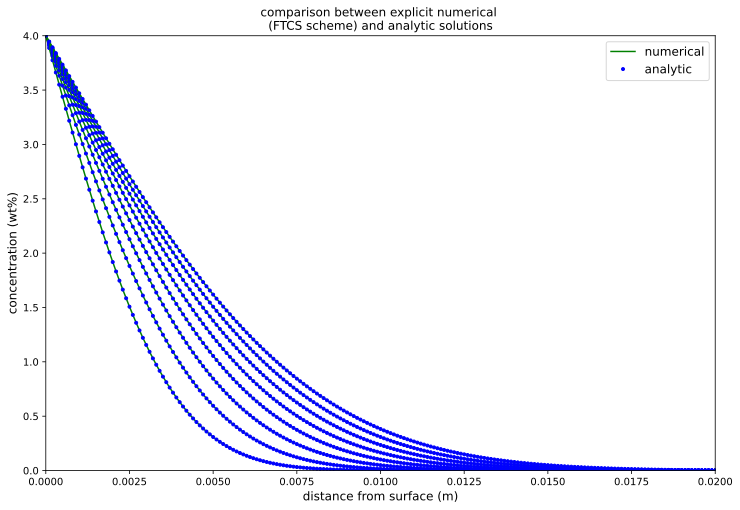

In [2]:
# plotting:
plt.figure(figsize=(12,8))
plot_times = np.arange(2*t_max/10,t_max,t_max/10)
for t in plot_times:
    plt.plot(x,C[int(t/dt),:],'green', label='numerical')
    C_analytic = diffusion_analytic(t,x_max,C0,dx,diffusion_co)
    plt.plot(x,C_analytic,'ok',color = 'blue', label='analytic',markersize=3)
    if t==plot_times[0]:
        plt.legend(fontsize=12)
plt.xlabel('distance from surface (m)',fontsize=12)
plt.ylabel('concentration (wt%)',fontsize=12)
plt.axis([0,x_max,0,C0])
plt.title('comparison between explicit numerical \n(FTCS scheme) and analytic solutions');

In [3]:
# save  all the concentration profiles data at all time steps into excel file
t = np.arange(0,t_max+dt,dt)
df= pd.DataFrame(C,columns = x,)
df.insert(0, "time/ x", t, True)
df=df.set_index(['time/ x'])
df.to_excel('data.xlsx')

In [4]:
df= pd.DataFrame(C,columns = x,)

In [5]:
df

,0.0000,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,...,0.0191,0.0192,0.0193,0.0194,0.0195,0.0196,0.0197,0.0198,0.0199,0.0200
0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,4.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,4.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,4.0,2.500000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,4.0,2.500000,1.500000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,4.0,3.949515,3.899056,3.848596,3.798212,3.747829,3.697571,3.647313,3.597231,3.547149,...,0.006271,0.005546,0.004820,0.004116,0.003412,0.002724,0.002035,0.001356,0.000676,0.0
3997,4.0,3.949528,3.899056,3.848634,3.798212,3.747892,3.697571,3.647401,3.597231,3.547261,...,0.006285,0.005546,0.004831,0.004116,0.003420,0.002724,0.002040,0.001356,0.000678,0.0
3998,4.0,3.949528,3.899081,3.848634,3.798263,3.747892,3.697646,3.647401,3.597331,3.547261,...,0.006285,0.005558,0.004831,0.004126,0.003420,0.002730,0.002040,0.001359,0.000678,0.0
3999,4.0,3.949541,3.899081,3.848672,3.798263,3.747955,3.697646,3.647489,3.597331,3.547373,...,0.006299,0.005558,0.004842,0.004126,0.003428,0.002730,0.002044,0.001359,0.000679,0.0
